# Projections Analysis: Backtest & Forecast

This notebook analyzes the performance of our **Marcel Projection System**.

## 1. Backtest: Predicting IPL 2025
We trained the model on data from **2022-2024** to predict **2025**. Now we compare those predictions against what actually happened in 2025.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

# Paths
PROJECT_ROOT = Path('..')
BACKTEST_DIR = PROJECT_ROOT / 'results' / '13_projections' / 'backtest_2025'
FORECAST_DIR = PROJECT_ROOT / 'results' / '13_projections' / 'forecast_2026'
ACTUAL_DIR = PROJECT_ROOT / 'results' / '09_vorp_war'

# Load Data
def load_backtest_data():
    # Load Predictions
    pred_bat = pd.read_csv(BACKTEST_DIR / 'batter_projections_2025.csv')
    pred_bowl = pd.read_csv(BACKTEST_DIR / 'bowler_projections_2025.csv')
    
    # Load Actuals (2025 only)
    act_bat = pd.read_csv(ACTUAL_DIR / 'batter_war.csv')
    act_bat = act_bat[act_bat['season'] == 2025].rename(columns={'batter_name': 'player_name'})
    
    act_bowl = pd.read_csv(ACTUAL_DIR / 'bowler_war.csv')
    act_bowl = act_bowl[act_bowl['season'] == 2025].rename(columns={'bowler_name': 'player_name'})
    
    # Merge
    bat_merged = pred_bat.merge(act_bat[['player_name', 'WAR', 'balls_faced']], 
                                on='player_name', how='inner', suffixes=('_pred', '_act'))
    
    bowl_merged = pred_bowl.merge(act_bowl[['player_name', 'WAR', 'balls_bowled']], 
                                  on='player_name', how='inner', suffixes=('_pred', '_act'))
    
    return bat_merged, bowl_merged

bat_df, bowl_df = load_backtest_data()
print(f"Matched {len(bat_df)} batters and {len(bowl_df)} bowlers for backtesting.")

Matched 135 batters and 105 bowlers for backtesting.


### Batting Projections Performance

Batting Projection Accuracy:
  MAE:  0.143 WAR
  RMSE: 0.215 WAR
  R2:   0.276


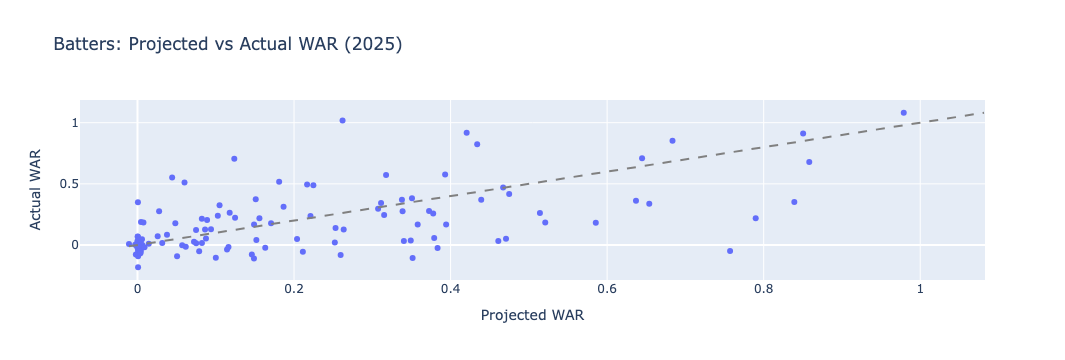

In [2]:
# Metrics
mae = mean_absolute_error(bat_df['WAR'], bat_df['projected_war_2025'])
rmse = np.sqrt(mean_squared_error(bat_df['WAR'], bat_df['projected_war_2025']))
r2 = r2_score(bat_df['WAR'], bat_df['projected_war_2025'])

print(f"Batting Projection Accuracy:")
print(f"  MAE:  {mae:.3f} WAR")
print(f"  RMSE: {rmse:.3f} WAR")
print(f"  R2:   {r2:.3f}")

# Scatter Plot
fig = px.scatter(bat_df, x='projected_war_2025', y='WAR', hover_name='player_name',
                 title='Batters: Projected vs Actual WAR (2025)',
                 labels={'projected_war_2025': 'Projected WAR', 'WAR': 'Actual WAR'})
fig.add_shape(type="line", line=dict(dash='dash', color='gray'),
              x0=bat_df['projected_war_2025'].min(), y0=bat_df['projected_war_2025'].min(),
              x1=bat_df['WAR'].max(), y1=bat_df['WAR'].max())
fig.show()

### Bowling Projections Performance

In [3]:
# Metrics
mae = mean_absolute_error(bowl_df['WAR'], bowl_df['projected_war_2025'])
rmse = np.sqrt(mean_squared_error(bowl_df['WAR'], bowl_df['projected_war_2025']))
r2 = r2_score(bowl_df['WAR'], bowl_df['projected_war_2025'])

print(f"Bowling Projection Accuracy:")
print(f"  MAE:  {mae:.3f} WAR")
print(f"  RMSE: {rmse:.3f} WAR")
print(f"  R2:   {r2:.3f}")

# Scatter Plot
fig = px.scatter(bowl_df, x='projected_war_2025', y='WAR', hover_name='player_name',
                 title='Bowlers: Projected vs Actual WAR (2025)',
                 labels={'projected_war_2025': 'Projected WAR', 'WAR': 'Actual WAR'})
fig.add_shape(type="line", line=dict(dash='dash', color='gray'),
              x0=bowl_df['projected_war_2025'].min(), y0=bowl_df['projected_war_2025'].min(),
              x1=bowl_df['WAR'].max(), y1=bowl_df['WAR'].max())
fig.show()

Bowling Projection Accuracy:
  MAE:  0.212 WAR
  RMSE: 0.297 WAR
  R2:   0.230


## 2. Forecast: IPL 2026 Projections

Based on the model (trained on 2023-2025), here are the projections for the 2026 season.

In [4]:
def load_forecast_data():
    pred_bat = pd.read_csv(FORECAST_DIR / 'batter_projections_2026.csv')
    pred_bowl = pd.read_csv(FORECAST_DIR / 'bowler_projections_2026.csv')
    return pred_bat, pred_bowl

proj_bat, proj_bowl = load_forecast_data()

print("Top 10 Projected Batters for 2026:")
display(proj_bat[['player_name', 'age_2026', 'projected_war_2026']].head(10))

Top 10 Projected Batters for 2026:


,player_name,age_2026,projected_war_2026
0,MA Agarwal,35.0,0.052033
1,MJ Suthar,24.0,0.000202
2,JR Hazlewood,35.0,0.000293
3,V Viyaskanth,25.0,0.000711
4,Liton Das,36.0,0.000337
5,Vishnu Vinod,33.0,0.002303
6,R Parag,25.0,0.305666
7,PHKD Mendis,28.0,0.012443
8,A Manohar,32.0,0.009085
9,V Shankar,37.0,0.105577


In [5]:
print("Top 10 Projected Bowlers for 2026:")
display(proj_bowl[['player_name', 'age_2026', 'projected_war_2026']].head(10))

Top 10 Projected Bowlers for 2026:


,player_name,age_2026,projected_war_2026
0,MJ Suthar,24.0,0.001953
1,K Yadav,31.0,0.006738
2,JR Hazlewood,35.0,0.188306
3,V Viyaskanth,25.0,0.024126
4,R Parag,25.0,0.103491
5,PHKD Mendis,28.0,0.014302
6,Akash Deep,30.0,0.018981
7,Mustafizur Rahman,31.0,0.233961
8,KA Maharaj,36.0,0.012403
9,HR Shokeen,26.0,0.013566


### Biggest Risers & Fallers
Comparing 2025 Actuals to 2026 Projections.

In [6]:
# Merge 2026 Projections with 2025 Actuals
bat_change = proj_bat.merge(bat_df[['player_name', 'WAR']], on='player_name', how='inner')
bat_change['diff'] = bat_change['projected_war_2026'] - bat_change['WAR']

print("Biggest Projected Improvements (Batters):")
display(bat_change.nlargest(5, 'diff')[['player_name', 'WAR', 'projected_war_2026', 'diff']])

print("\nBiggest Projected Declines (Batters):")
display(bat_change.nsmallest(5, 'diff')[['player_name', 'WAR', 'projected_war_2026', 'diff']])

Biggest Projected Improvements (Batters):


,player_name,WAR,projected_war_2026,diff
29,F du Plessis,-0.049719,0.449197,0.498917
35,RD Gaikwad,0.218765,0.567646,0.348881
91,Shubman Gill,0.350878,0.660609,0.309732
77,J Fraser-McGurk,-0.082507,0.209165,0.291672
80,VR Iyer,0.051125,0.334332,0.283207



Biggest Projected Declines (Batters):


,player_name,WAR,projected_war_2026,diff
66,SS Iyer,1.017120,0.401438,-0.615682
33,MR Marsh,0.705559,0.263544,-0.442015
63,D Brevis,0.551073,0.109281,-0.441792
48,AK Markram,0.516724,0.173803,-0.342921
134,Naman Dhir,0.510613,0.187440,-0.323173
